In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

    
PATH='C:\\Users\\Robin_ULB\\Documents\\IBA_Work\\GitHub_IBA'
sys.path.append(PATH)
PATH='C:\\Users\\Robin_ULB\\Documents\\IBA_Work\\GitHub_IBA\\IBA-Optics'
sys.path.append(PATH)

from georges import *


def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
        
## Define the beamline and plot it

b = Beam(energy=200).from_5d_multigaussian_distribution(20,
                                               XRMS=0.01,
                                               PXRMS=0.001,
                                               YRMS=0.01,
                                               PYRMS=0.001,
                                               DPPRMS=0.00)
bl = Beamline('Proteus1', beam=b, elements='beamlines/elements', path=PATH, prefix='beamlines/generic')

## Treat G4BeamLine results for horizontal plane

   
Folder='Results/'
Zposition=[]
Nprotons=[]

Beamparameter=[]
columnsName=['meanHOR','meanVER','EmitHOR','EmitVER','BetaHOR','BetaVER','AlphaHOR','AlphaVER']
Field=[]

for file in os.listdir(Folder):

    if file.endswith(".txt") and "DetZ" in file:
            
        DataDetector=pd.read_table(Folder+file)

        if(len(DataDetector)==0):
            print(file)
        if(len(DataDetector) >0 ):
                        
            z=float(file.replace('Results_DetZ','').replace('.txt',''))
            Zposition.append(z)
            Nprotons.append(len(DataDetector))
            
            physics.compute_EnergyAndDivergence(DataDetector)
            Beamparameter.append(physics.compute_TwissParameter(DataDetector))
            Field.append(DataDetector['By'].mean())

InitialProtons=len(pd.read_table(Folder+'Results_DetBEAM.txt'))
Zposition=np.divide(Zposition,1000)
Transmission=np.multiply(np.divide(Nprotons,InitialProtons),100)

ResultsTransmission=pd.Series(Transmission,Zposition)
ResultsTransmission=ResultsTransmission.sort_index()

ResultsBeam=pd.DataFrame(Beamparameter,index=Zposition,columns=columnsName)
ResultsBeam=ResultsBeam.sort_index()

ResultsField=pd.Series(Field,Zposition)
ResultsField=ResultsField.sort_index()

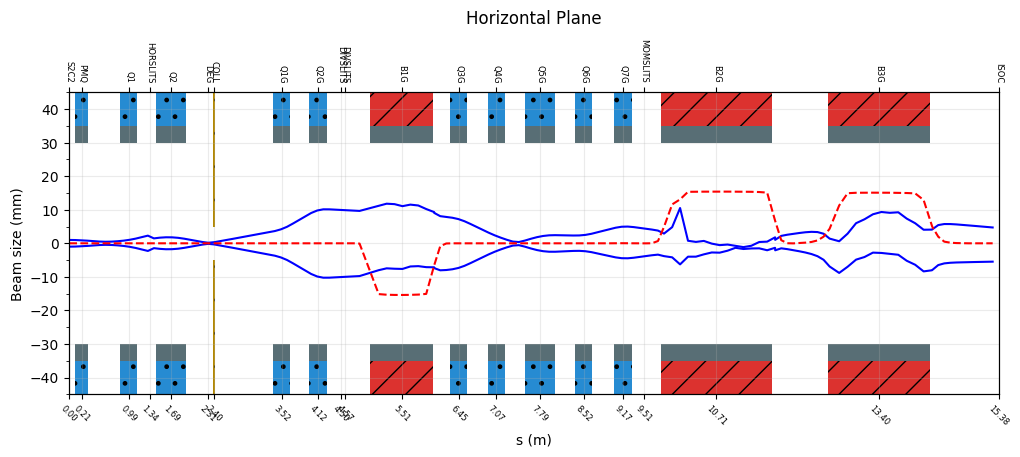

In [9]:
fig = plt.figure(figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')   
ax = fig.add_subplot(111)
prepare(ax, bl)
aperture(ax, bl)
ax.set_title('Horizontal Plane',y=1.2)

ResultsHOR=ResultsBeam.filter(['meanHOR','EmitHOR','BetaHOR'], axis=1)
ResultsHOR.rename(index=str, columns={"meanHOR": "meanPos", 'EmitHOR': 'Emittance', 'BetaHOR':'Beta'}, inplace=True)

#print(ResultsHOR['Emittance']*ResultsHOR['Beta'])
#tracking.plotg4enveloppe(ax,ResultsHOR)

## La partie ci-dessous doit aller dans une fonction plotting de georges

DataPlot=ResultsHOR
DataPlot['Product']=np.sqrt(DataPlot['Emittance']*DataPlot['Beta'])

enveloppe_Min=DataPlot['meanPos']-DataPlot['Product']
enveloppe_Max=DataPlot['meanPos']+DataPlot['Product']

DataPlot['min']=DataPlot['meanPos']-DataPlot['Product']
DataPlot['max']=DataPlot['meanPos']+DataPlot['Product']

#print(DataPlot)
ax.plot(DataPlot.index,enveloppe_Max,'b')
ax.plot(DataPlot.index,enveloppe_Min,'b')
#ax.fill_between(DataPlot.index,enveloppe_Min,enveloppe_Max) -> Error here

ax.plot(ResultsField.index,ResultsField*10,'--r')

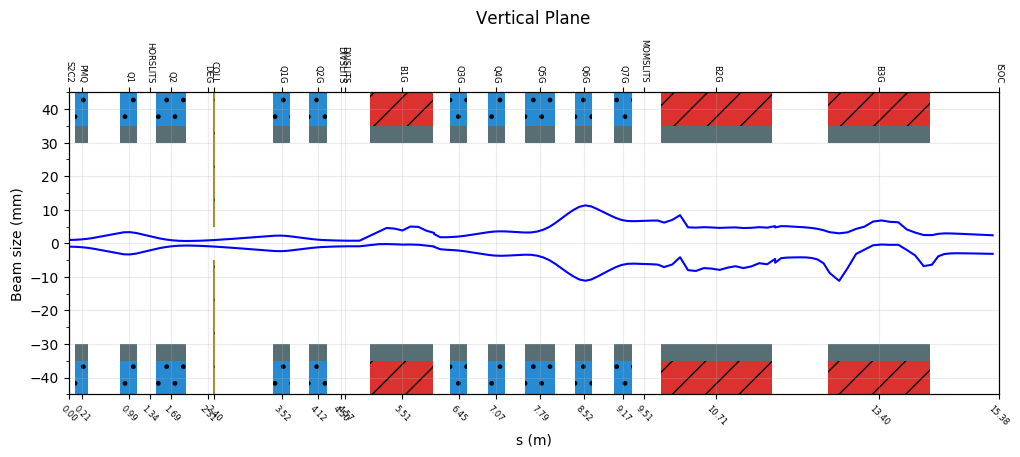

In [10]:
fig = plt.figure(figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')   
ax1 = fig.add_subplot(111)
prepare(ax1, bl)
aperture(ax1, bl)
ax1.set_title('Vertical Plane',y=1.2)

ResultsVER=ResultsBeam.filter(['meanVER','EmitVER','BetaVER'], axis=1)
ResultsVER.rename(index=str, columns={"meanVER": "meanPos", 'EmitVER': 'Emittance', 'BetaVER':'Beta'}, inplace=True)

#print(ResultsHOR['Emittance']*ResultsHOR['Beta'])
#tracking.plotg4enveloppe(ax,ResultsHOR)

DataPlot=ResultsVER
DataPlot['Product']=np.sqrt(DataPlot['Emittance']*DataPlot['Beta'])

enveloppe_Min=DataPlot['meanPos']-DataPlot['Product']
enveloppe_Max=DataPlot['meanPos']+DataPlot['Product']

DataPlot['min']=DataPlot['meanPos']-DataPlot['Product']
DataPlot['max']=DataPlot['meanPos']+DataPlot['Product']

ax1.plot(DataPlot.index,enveloppe_Max,'b')
ax1.plot(DataPlot.index,enveloppe_Min,'b')

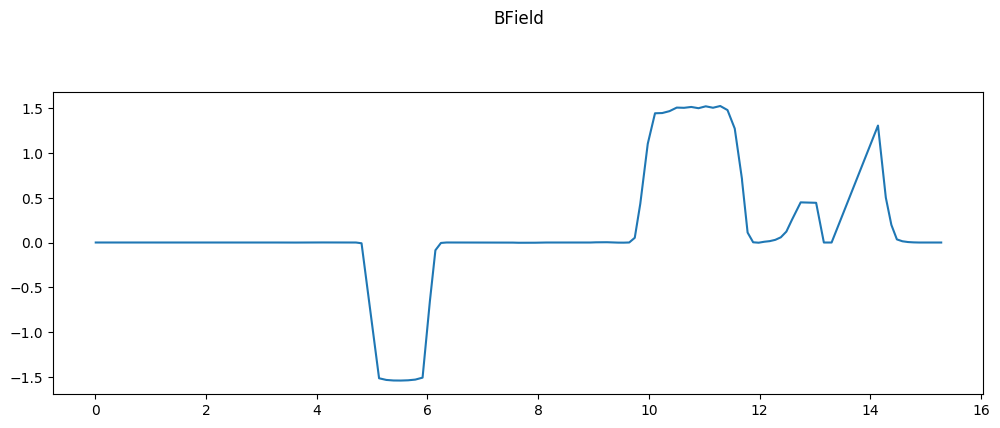

In [7]:
fig = plt.figure(figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')   
ax = fig.add_subplot(111)

ax.set_title('BField',y=1.2)

ax.plot(ResultsField.index,ResultsField)

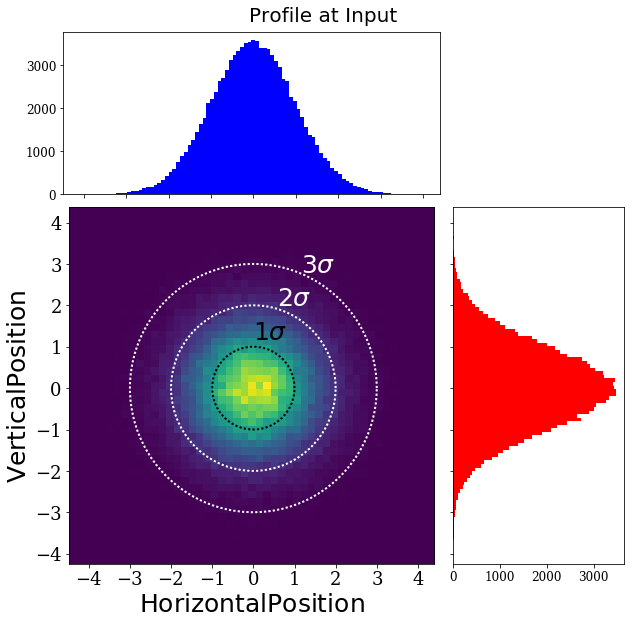

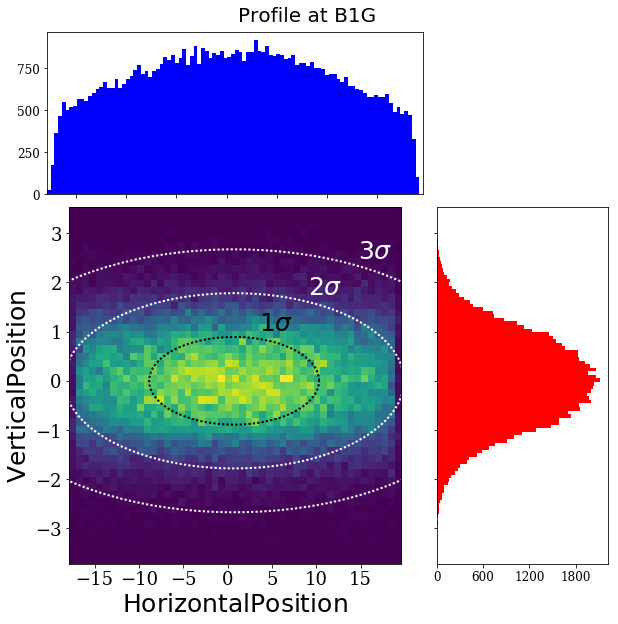

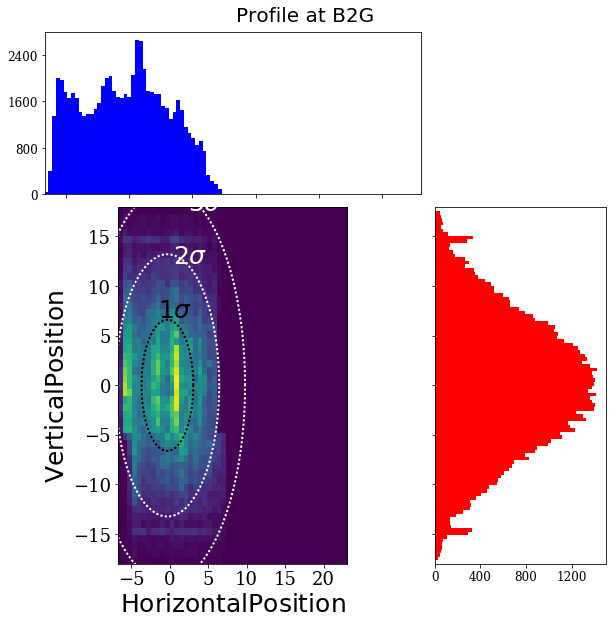

In [11]:
from georges.plotting import plot2Dprofile as plt2D

## BEAM INPUT PROFILE
DataDetector=pd.read_table('Results\Results_DetBEAM.txt')
physics.compute_EnergyAndDivergence(DataDetector)

fig=plt.figure(1, figsize=(9.5,9))
plt2D.make2Dplot(fig,DataDetector['x'],DataDetector['y'])

xlabel = '$\mathrm{Horizontal Position}$'
ylabel = '$\mathrm{Vertical Position}$'

fig.axes[0].set_xlabel(xlabel,fontsize=25)
fig.axes[0].set_ylabel(ylabel,fontsize=25)
fig.suptitle('Profile at Input', fontsize=20)


## B1G INPUT PROFILE
DataDetector=pd.read_table('Results\Results_DetB1GIN.txt')
physics.compute_EnergyAndDivergence(DataDetector)

fig2=plt.figure(2, figsize=(9.5,9))
plt2D.make2Dplot(fig2,DataDetector['x'],DataDetector['y'])

xlabel = '$\mathrm{Horizontal Position}$'
ylabel = '$\mathrm{Vertical Position}$'

fig2.axes[0].set_xlabel(xlabel,fontsize=25)
fig2.axes[0].set_ylabel(ylabel,fontsize=25)
fig2.suptitle('Profile at B1G', fontsize=20)


## B2G PROFILE
DataDetector=pd.read_table('Results\Results_DetB2GIN.txt')
physics.compute_EnergyAndDivergence(DataDetector)

fig3=plt.figure(3, figsize=(9.5,9))
plt2D.make2Dplot(fig3,DataDetector['x'],DataDetector['y'])

xlabel = '$\mathrm{Horizontal Position}$'
ylabel = '$\mathrm{Vertical Position}$'

fig3.axes[0].set_xlabel(xlabel,fontsize=25)
fig3.axes[0].set_ylabel(ylabel,fontsize=25)
fig3.suptitle('Profile at B2G', fontsize=20)

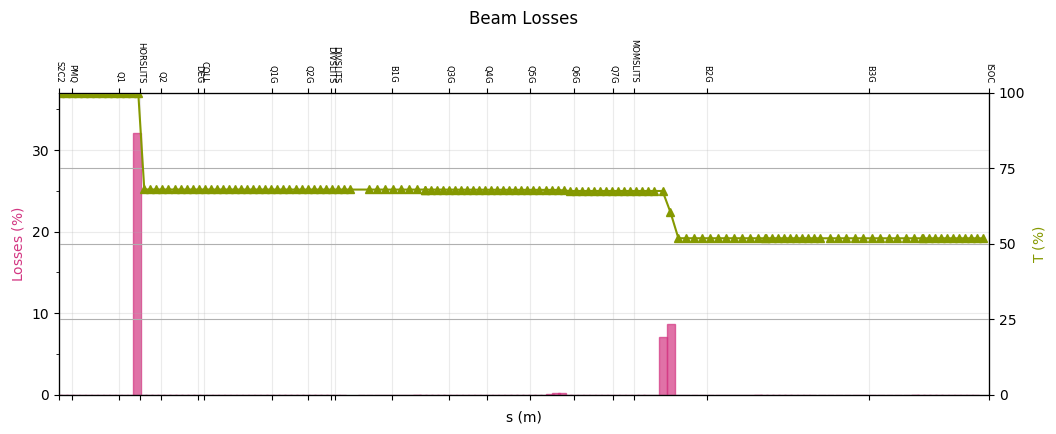

In [7]:
fig = plt.figure(figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')   
ax = fig.add_subplot(111)
prepare(ax, bl)
losses(ax,ResultsTransmission,bl)
ax.set_title('Beam Losses',y=1.2)

In [ ]:
import numpy as np

## Pour le placement et le changement de repère de B1 to B2

beamPos=-13000
Elementpos=4351.49220639

print(Elementpos-beamPos)


x=[12370.65,3141.965047]
Origin=[0,0]
x=np.subtract(x,Origin)

theta=np.deg2rad(40)
#A=([np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)])

#xdot = np.matmul(A,x)
#print(xdot)

xdot2=x[0]*np.cos(theta)+x[1]*np.sin(theta)
ydot2=-x[0]*np.sin(theta)+x[1]*np.cos(theta)
print(xdot2,ydot2)

a=546.491898651
b=5211.85621814

print(b-a)

## B2-> B3

x=[4572.18089617, -2399.16919418]
Origin=[5401,0]
x=np.subtract(x,Origin)

theta=np.deg2rad(-70)
#A=([np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)])

#xdot = np.matmul(A,x)
#print(xdot)

xdot2=x[0]*np.cos(theta)+x[1]*np.sin(theta)
ydot2=-x[0]*np.sin(theta)+x[1]*np.cos(theta)
print('repere B')
print(xdot2,ydot2)

In [ ]:
import numpy as np
##Distance entre 2 points
p0=[-3832.3054,2359.2499]
p1=[-3571.33,2578.24]
p2=[-3310.9248,2796.7402]

print(np.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)) # B2-B3
print(np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)) #B3-EndB3

print(11.5227+2.5809916251)#+0.828+1.101)

In [ ]:
print(10150.806+1500*np.sin(np.deg2rad(35)))